In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from scipy.stats import norm,t
from ipywidgets import interact, IntSlider, FloatSlider

# D1

In [8]:
def experiment1(n_experiment):
    total=0
    for i in range(n_experiment):
        octa=np.random.randint(1,9)
        dodec=np.random.randint(1,13)
        icosa=np.random.randint(1,21)
        if octa + dodec == icosa:
            total += 1.0
    return total/n_experiment

In [9]:
def D1(N,n):
    D=[]
    for i in range(N):
        D.append(experiment1(n))
    return D

Data Set- D_1

In [10]:
D_1=D1(1000,100)

True Mean

In [11]:
U_D1=mean(D_1)
print('True Mean = ',U_D1)

True Mean =  0.05032000000000001


Standard Deviation

In [12]:
S_D1=std(D_1,ddof=1)
print('True Standard Deviation = ',S_D1)

True Standard Deviation =  0.02166487865110181


Boxplot

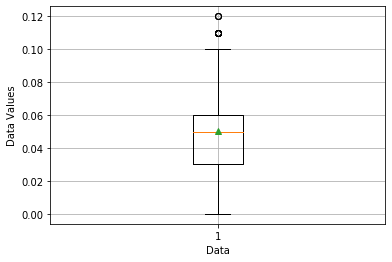

In [25]:
boxplot(D_1,showmeans=True);
xlabel('Data')
ylabel('Data Values')
grid()

Sampling Distribution:

In [256]:
def S_1(H,M):
    global Mean1,Sd1,M1,St1
    Mean1=[]
    Sd1=[]
    for x in range(M):
        S=[]
        for i in range(H):
            m=randint(1000)
            S.append(D_1[m])
        Mean1.append(mean(S))
        Sd1.append(std(S,ddof=1))
    M1=mean(Mean1)
    St1=std(Sd1,ddof=1)
    return Mean1,Sd1

In [257]:
def S1(H,M):
    xlim(0.02,0.09)
    hist(S_1(H,M)[0],bins=50,density=True,color='red');
    xlabel('Probability Values')
    ylabel('f')

Text(0.5, 1.0, 'N=40')

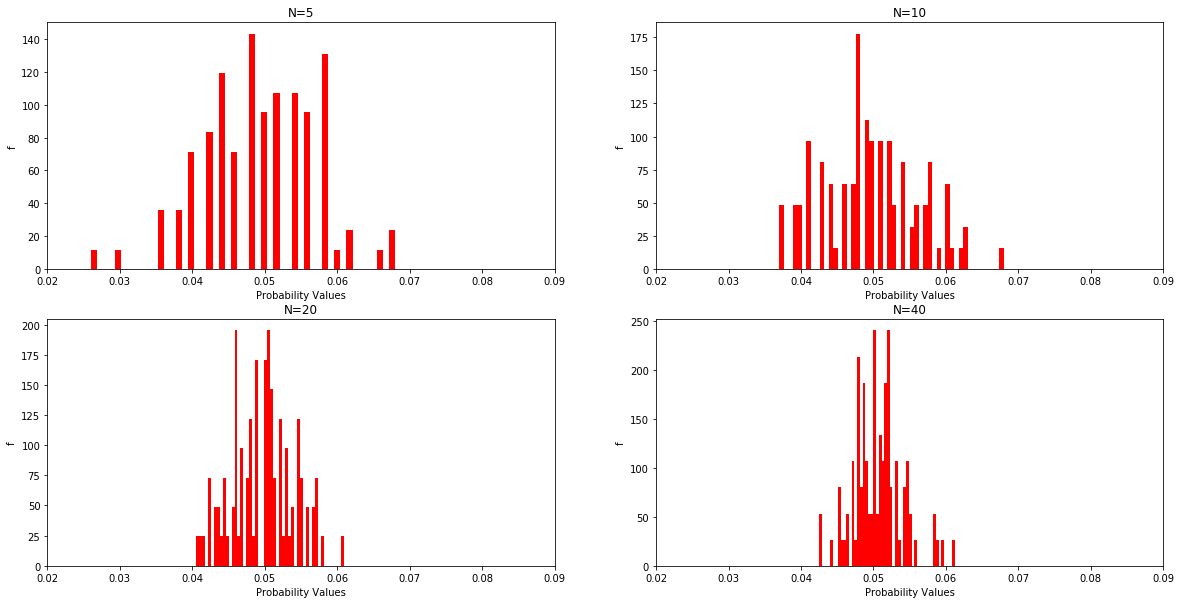

In [258]:
figure(figsize=(20,10))

subplot(2,2,1)
S1(5,100)
title('N=5')

subplot(2,2,2)
title('N=10')
S1(10,100)

subplot(2,2,3)
S1(20,100)
title('N=20')

subplot(2,2,4)
S1(40,100)
title('N=40')

In [259]:
def conmpare_t_norm1(H,M):    
    x=linspace(-5,5)
    hist((H**0.5)*(Mean1-U_D1)/(S_D1),bins=50,density=True,color='red');
    plot(x, norm.pdf(x, loc=0, scale=1),'y--',label='Normal Distribution')
    plot(x, t.pdf(x,H-1),'.-.',label='t-distribution')
    legend(loc='best')
    xlabel('x')
    ylabel('Density')

In [260]:
interact(conmpare_t_norm1,H=(5,200),M=(100,1000))

interactive(children=(IntSlider(value=102, description='H', max=200, min=5), IntSlider(value=550, description=…

<function __main__.conmpare_t_norm1(H, M)>

Confidence Intervals

In [261]:
def ConfInt1(percent,H):
    alpha1 = 1.0 - percent
    ppf1 = 1.0 - (0.5*alpha1)
    ct1= (t.ppf(ppf1, H-1))*(St1/(sqrt(H))) 
    print("{}% confidence interval of the mean ( T- distribution): {:.4f} +- {:.8f}".format(percent*100, M1, ct1))
    
def Conf_Int1(percent,H):
    alpha1 = 1.0 - percent
    ppf1 = 1.0 - (0.5*alpha1)
    cn1= (norm.ppf(ppf1))*(St1/(sqrt(H))) 
    print("{}% confidence interval of the mean ( Normal- distribution): {:.4f} +- {:.8f}".format(percent*100, M1, cn1),'\n')


In [262]:
def Conf_print(H):
    print('N=',H)
    ConfInt1(0.8,H)
    Conf_Int1(0.8,H)
    ConfInt1(0.95,H)
    Conf_Int1(0.95,H)
    ConfInt1(0.99,H)
    Conf_Int1(0.99,H)

In [263]:
interact(Conf_print,H=(5,100,5));

interactive(children=(IntSlider(value=50, description='H', min=5, step=5), Output()), _dom_classes=('widget-in…

For a fixed N, the confidence interval with a lower percentage is located inside the one with a higher percentage. As N increases, the width of the confidence interval of the t- distribution decreases. Also, for a large N, the confidence intervals of t- distribution and normal- distribution get closer.

In [264]:
def diff(percent,H):
    alpha1 = 1.0 - percent
    ppf1 = 1.0 - (0.5*alpha1)
    cn1= (norm.ppf(ppf1))*(St1/(sqrt(H)))
    ct1= (t.ppf(ppf1, H-1))*(St1/(sqrt(H))) 
    k=ct1 - cn1
    return k

In [274]:
def decrease_interval_diff(percent):
    x=[5,10,20,30,40]
    K= [diff(percent,5),diff(percent,10),diff(percent,20),diff(percent,30),diff(percent,40)]
    plot(x,K,'go')
    ylim(0,0.0025)
    xlabel('Sample Size')
    ylabel('Difference in Confidence Interval')

In [275]:
interact(decrease_interval_diff,percent=(0.80,0.99,0.01))

interactive(children=(FloatSlider(value=0.89, description='percent', max=0.99, min=0.8, step=0.01), Output()),…

<function __main__.decrease_interval_diff(percent)>


CONFIDENCE INTERVAL AND BOXPLOT:

In [267]:
# The confidence intervals exceed the interquantile region of the boxplot for higher percentages.

COMPUTATIONALLY DETERMING THE VALIDITY OF CONFIDENCE INTERVALS-

In [268]:
def confinter_1(H,percent,M):
    d1t,d1n = 0,0
    alpha1 = 1.0 - percent
    ppf1 = 1.0 - (0.5*alpha1)
    for m in range(M):
        k=random.randint(len(Mean1))
        kj= Sd1[k]
        ki= Mean1[k]
        c1t= (t.ppf(ppf1, H-1))*(kj/(sqrt(H)))
        c1n= (norm.ppf(ppf1))*(kj/(sqrt(H)))
        if ki-c1t <= U_D1 <= ki + c1t:
                d1t += 1
        if ki-c1n <= U_D1 <= ki + c1n:
                d1n += 1
    d1t /= M
    d1n /= M
    print("Fraction of experiments where true mean lies in confidence interval (t-distribution) = {}".format(d1t))
    print("Fraction of experiments where true mean lies in confidence interval (Normal-Distribution) = {}".format(d1n))

In [269]:
interact(confinter_1,H=(5,40,5),percent=(0.8,0.99,0.01), M=(50,500,50));

interactive(children=(IntSlider(value=20, description='H', max=40, min=5, step=5), FloatSlider(value=0.89, des…

The t-distribution is more accurate for calculating the confidence interval as compared to the normal distribution.

# D2

Data Set D2

In [130]:
D2=[580,845,1317,2015,2800,4581,6058,7813,9823,11950,14553,17391,20630,24545,28266,31439,34876,37552,40553,43099,45134,59287,64438,67100,69197,71329,73332,75184,75700,76677,77673,78651,79205,80087,80828,81820,83108,84615,86605,88585,90447,93018,95324,98418,102059,106117,110013,114448,119019,124335,134594,145527,156512,169543,182470,198246,218983,245162,275874,305366,337843,379469,423363,472100,533205,598060,664940,725584,790012,864229,941687,1022140,1106573,1188365,1259285,1332572,1411180,1496019,1581505,1673711,1753367,1825079,1895521,1968891,2051944,2132952,2218208,2298862,2374486,2448176,2523812,2604070,2689021,2791121,2881533,2955078,3024621,3100170,3180137,3266132,3361305,3444192,3526536,3606039,3687506,3783479,3879928,3976563,4065924,4145975,4220794,4306378,4395823,4492780,4593072,4689879,4772122,4862217,4957412,5060164,5167106,5275936,5375871,5472605,5562645,5655465,762281,5879114,6005239,6129572,6238550]

In [131]:
len(D2)

131

True Mean

In [164]:
U_D2= mean(D2)
print('Mean = ',U_D2)

Mean =  1641696.2671755725


Standard Deviation

In [134]:
S_D2=std(D2,ddof=1)
print('Standard deviation=',S_D2)

Standard deviation= 1918736.6886133451


Boxplot

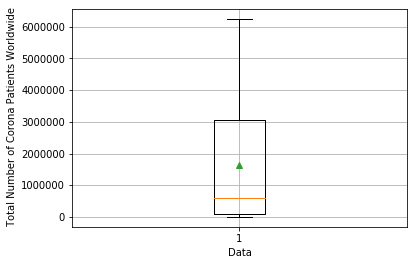

In [135]:
boxplot(D2,showmeans=True);
xlabel('Data')
ylabel(' Total Number of Corona Patients Worldwide')
grid()

Sampling Distribution:

In [241]:
def S_2(N,M):
    global M2,St2,Mean2,Sd2
    Mean2=[]
    Sd2=[]
    for x in range(M):
        S=[]
        for i in range(N):
            m=random.randint(131)
            S.append(D2[m])
        Mean2.append(mean(S))
        Sd2.append(std(S,ddof=1))
    M2= mean(Mean2)
    St2=std(Sd2,ddof=1)
    return Mean2,Sd2
    

In [242]:
def S2(N,M):   
    hist(S_2(N,M)[0],bins=50,density=True,color='red');
    x=linspace(0,6000000)
    plot(x, norm.pdf(x, loc=M2, scale=St2),'g--', label='Normal Distribution')
    plot(x, t.pdf(x,N-1,loc=M2, scale=St2),'.-.', label='T- Distribution')
    legend(loc='best')
    xlabel('Total Number of Corona Patients Worldwide')
    ylabel('Density')

Text(0.5, 1.0, 'N=40')

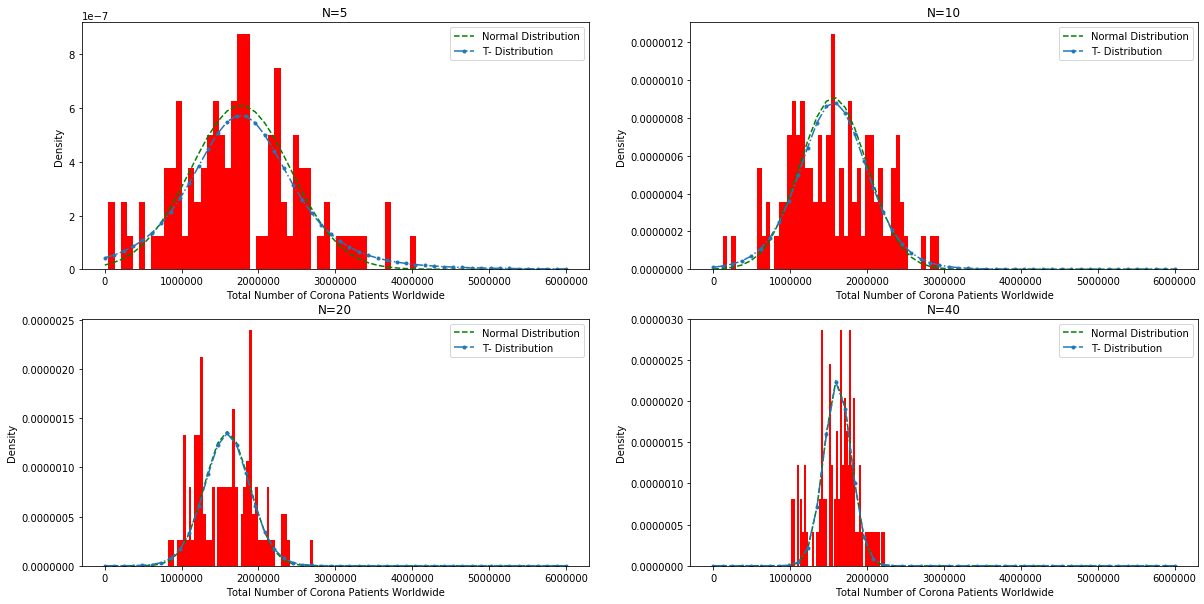

In [243]:
figure(figsize=(20,10))

subplot(2,2,1)
S2(5,100)
title('N=5')

subplot(2,2,2)
title('N=10')
S2(10,100)

subplot(2,2,3)
S2(20,100)
title('N=20')

subplot(2,2,4)
S2(40,100)
title('N=40')


In [244]:
interact(S2,N=(5,500),M=(100,1000));

interactive(children=(IntSlider(value=252, description='N', max=500, min=5), IntSlider(value=550, description=…

Confidence Intervals

In [245]:
def ConfInt2(percent,N):
    alpha2 = 1.0 - percent
    ppf2 = 1.0 - (0.5*alpha2)
    c2= (t.ppf(ppf2, N-1))*(St2/(sqrt(N))) 
    print("{}% confidence interval of the mean ( T- distribution): {:.4f} +- {:.8f}".format(percent*100, M2, c2))

In [246]:
def Conf_Int2(percent,N):
    alpha2 = 1.0 - percent
    ppf2 = 1.0 - (0.5*alpha2)
    c2= (norm.ppf(ppf2))*(St2/(sqrt(N))) 
    print("{}% confidence interval of the mean ( Normal- distribution): {:.4f} +- {:.8f}".format(percent*100, M2, c2),'\n')

In [247]:
def Conf_print2(N):
    print('N=',N)
    ConfInt2(0.8,N)
    Conf_Int2(0.8,N)
    
    ConfInt2(0.95,N)
    Conf_Int2(0.95,N)
    ConfInt2(0.99,N)
    Conf_Int2(0.99,N)

In [248]:
interact(Conf_print2,N=(5,100,5),M=(100,500,50));

interactive(children=(IntSlider(value=50, description='N', min=5, step=5), Output()), _dom_classes=('widget-in…

For a fixed N, the confidence interval with a lower percentage is located inside the one with a higher percentage. As N increases, the width of the confidence interval of the t- distribution decreases.
Also, for a large N, the confidence intervals of t- distribution and normal- distribution get closer.

In [249]:
def diff2(percent,H):
    alpha2 = 1.0 - percent
    ppf2 = 1.0 - (0.5*alpha2)
    cn2= (norm.ppf(ppf2))*(St2/(sqrt(H)))
    ct2= (t.ppf(ppf2, H-1))*(St2/(sqrt(H))) 
    k=ct2 - cn2
    return k

In [250]:
def decrease_interval_diff2(percent):
    x=[5,10,20,30,40]
    K= [diff2(percent,5),diff2(percent,10),diff2(percent,20),diff2(percent,30),diff2(percent,40)]
    plot(x,K,'go')
    xlabel('Sample Size')
    ylabel('Difference in Confidence Interval')

In [251]:
interact(decrease_interval_diff2,percent=(0.80,0.99,0.01))

interactive(children=(FloatSlider(value=0.89, description='percent', max=0.99, min=0.8, step=0.01), Output()),…

<function __main__.decrease_interval_diff2(percent)>

CONFIDENCE INTERVAL AND BOXPLOT:

In [252]:
# All the confidence intervals lie in the interquantile region of the boxplot.

Experimentally Determining whether Confidence Interval Is Correct:

In [254]:
def confinter_2(N,percent,M):
    d2t,d2n =0,0
    alpha2 = 1.0 - percent
    ppf2 = 1.0 - (0.5*alpha2)
    for e in range(M):
        k=random.randint(len(Sd2))
        ki2= Mean2[k]
        kj2= Sd2[k]
        c2t= (t.ppf(ppf2, N-1))*(kj2/(sqrt(N)))
        c2n= (norm.ppf(ppf2))*(kj2/(sqrt(N)))
        if (ki2 - c2t) <= U_D2 <= (ki2 + c2t):
                d2t += 1
        if ki2 - c2n <= U_D2 <= ki2 + c2n:
                d2n += 1
    d2t /=M
    d2n /=M
    print("Fraction of experiments where true mean lies in confidence interval (t-distribution)={}".format(d2t))
    print("Fraction of experiments where true mean lies in confidence interval (normal distribution)={}".format(d2n))

In [255]:
interact(confinter_2, N=(5,40,5),percent=(0.8,0.99,0.01), M=(100,500,50));

interactive(children=(IntSlider(value=20, description='N', max=40, min=5, step=5), FloatSlider(value=0.89, des…

The t-distribution is more accurate for calculating the confidence interval as compared to the normal distribution.

# D3

In [13]:
cd

C:\Users\Meghna Dixit


In [14]:
op=open("annual.txt")
re=op.read()
file=re.splitlines()
op.close()

In [15]:
del file[0]
len(file)

274

In [16]:
for i in range(136):
    if file[i].startswith('GCAG'):
        del file[i]

Data Set D3

In [17]:
D3=[]
for i in range(137):
    ele= file[i].split(',')
    D3.append(float(ele[2]) + 14.3)

In [18]:
len(D3)

137

True Mean

In [19]:
U_D3=mean(D3)
print('True Mean = ',U_D3)

True Mean =  14.325001459854015


Standard Deviation

In [20]:
S_D3=std(D3,ddof=1)
print('True Standard Deviation = ',S_D3)

True Standard Deviation =  0.32677056215634054


Boxplot

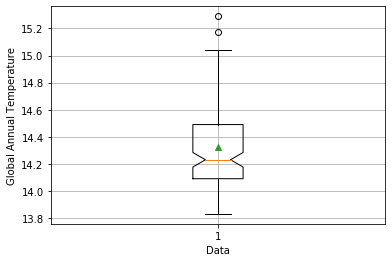

In [27]:
boxplot(D3,showmeans=True,notch=True);
xlabel('Data')
ylabel('Global Annual Temperature')
grid()

Sampling Distribution:

In [230]:

def S_3(H,M):
    global Mean3, Sd3,M3,St3
    Mean3=[]
    Sd3=[]
    for x in range(M):
        S=[]
        for i in range(H):
            m=randint(137)
            S.append(D3[m])
        Mean3.append(mean(S))
        Sd3.append(std(S,ddof=1))
    M3=mean(Mean3)
    St3=std(Sd3,ddof=1)
    return Mean3, Sd3


In [231]:
def S3(H,M):
    xlim(13,15)
    hist(S_3(H,M)[0],bins=50,density=True,color='red');
    xlabel('Global Annual Temperature')
    ylabel('Density')

Text(0.5, 1.0, 'N=40')

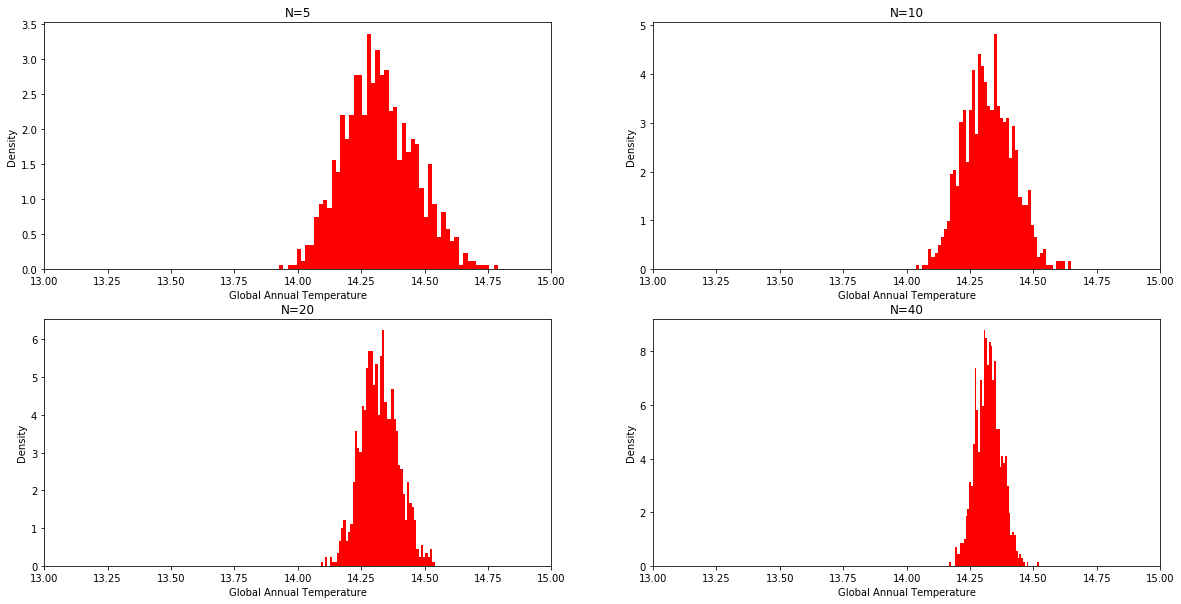

In [232]:
figure(figsize=(20,10))

subplot(2,2,1)
S3(5,1000)
title('N=5')

subplot(2,2,2)
title('N=10')
S3(10,1000)

subplot(2,2,3)
S3(20,1000)
title('N=20')

subplot(2,2,4)
S3(40,1000)
title('N=40')


In [233]:
def comp_t_norm(H,M):    
    x=linspace(-5,5)
    hist((H**0.5)*((S_3(H,M)[0])-U_D3)/S_D3,bins=50,density=True,color='red');
    plot(x, norm.pdf(x, loc=0, scale=1),'y--',label='Normal Distribution')
    plot(x, t.pdf(x,H-1),'.',label='t-distribution')
    legend(loc='best')
    xlabel('x')
    ylabel('Density')

In [234]:
interact(comp_t_norm,H=(5,500),M=(100,1000));

interactive(children=(IntSlider(value=252, description='H', max=500, min=5), IntSlider(value=550, description=…

CONFIDENCE INTERVALS

In [235]:
def ConfInt3(percent,H):
    alpha3 = 1.0 - percent
    ppf3 = 1.0 - (0.5*alpha3)
    ct3= (t.ppf(ppf3, H-1))*(St3/(sqrt(H))) 
    print("{}% confidence interval of the mean ( T- distribution): {:.4f} +- {:.8f}".format(percent*100, M3, ct3))
    
def Conf_Int3(percent,H):
    alpha3 = 1.0 - percent
    ppf3 = 1.0 - (0.5*alpha3)
    cn3= (norm.ppf(ppf3))*(St3/(sqrt(H))) 
    print("{}% confidence interval of the mean ( Normal- distribution): {:.4f} +- {:.8f}".format(percent*100, M3, cn3),'\n')

In [236]:
def Conf_print3(H):
    print('N=',H)
    ConfInt3(0.8,H)
    Conf_Int3(0.8,H)
    ConfInt3(0.95,H)
    Conf_Int3(0.95,H)
    ConfInt3(0.99,H)
    Conf_Int3(0.99,H)

In [237]:
interact(Conf_print3,H=(5,100,5));

interactive(children=(IntSlider(value=50, description='H', min=5, step=5), Output()), _dom_classes=('widget-in…

For a fixed N, the confidence interval with a lower percentage is located inside the one with a higher percentage.
As N increases, the width of the confidence interval of the t- distribution decreases. Also, for a large N, the confidence intervals of t- distribution and normal- distribution get closer.

Confidence Interval and Boxplot-

In [238]:
#All the confidence intervals lie in the interquantile region of the boxplot.

Experimentally Determining whether Confidence Interval Is Correct:

In [239]:
def confinter3(H,percent,M):
    d3t,d3n = 0,0
    alpha3 = 1.0 - percent
    ppf3 = 1.0 - (0.5*alpha3)
    for m in range(M):
        k=random.randint(len(Mean3))
        kj= Sd3[k]
        ki= Mean3[k]
        c3t= (t.ppf(ppf3, H-1))*(kj/(sqrt(H)))
        c3n= (norm.ppf(ppf3))*(kj/(sqrt(H)))
        if ki-c3t <= U_D3 <= ki + c3t:
                d3t += 1
        if ki-c3n <= U_D3 <= ki + c3n:
                d3n += 1
    d3t /= M
    d3n /= M
    print("Fraction of experiments where true mean lies in confidence interval (t-distribution) = {}".format(d3t))
    print("Fraction of experiments where true mean lies in confidence interval (normal distribution)= {}".format(d3n))

In [240]:
interact(confinter3,H=(5,40,5),percent=(0.8,0.99,0.01), M=(50,500,50));


interactive(children=(IntSlider(value=20, description='H', max=40, min=5, step=5), FloatSlider(value=0.89, des…

The t-distribution is more accurate for calculating the confidence interval as compared to the normal distribution.